In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Make the DF from the global_space_launches.csv
resource_dir = os.path.join('.','resources')
df = pd.read_csv(os.path.join(f'{resource_dir}','global_space_launches.csv'))
airforce_replace_dict={"Arme de l'Air":"France"}
df.replace(airforce_replace_dict,regex=True,inplace=True)
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


In [4]:
#List all the countries in order, and the years
countries = df["Companys Country of Origin"].unique()
years = df["Year"].unique().tolist()
#Reverse the list so our years are 
years.reverse()
countries

array(['USA', 'China', 'Russia', 'Japan', 'Isreal', 'Iran', 'Multi',
       'India', 'Germany', 'North Korea', 'South Korea', 'Brazil',
       'Ukraine', 'Italy', 'France', 'England'], dtype=object)

In [5]:
#Make a dataframe describing how many launches each country performs each year
countries_dict = {"Year":years}
for country in countries:
    countries_dict[country] = []
    for year in years:
        countries_dict[country].append(len(df.loc[(df["Year"] == year) & (df["Companys Country of Origin"] == country)]))

country_df = pd.DataFrame(countries_dict)

In [9]:
#I'm sure theres a better way to do this, and I'll discover it one day, but for now I looped over the countries with a print statement to generate these
usa_list = country_df['USA']
china_list = country_df['China']
russia_list = country_df['Russia']
japan_list = country_df['Japan']
isreal_list = country_df['Isreal']
iran_list = country_df['Iran']
multi_list = country_df['Multi']
india_list = country_df['India']
germany_list = country_df['Germany']
nk_list = country_df['North Korea']
sk_list = country_df['South Korea']
brazil_list = country_df['Brazil']
ukraine_list = country_df['Ukraine']
italy_list = country_df['Italy']
france_list = country_df['France']
england_list = country_df['England']

In [7]:
#Lets make a nice list of important dates in astro-exploration, based off the data pulled from wikipedia. Theres no data driven way I've done this, I've just Cherry picked dates that I found to be the most relevant or interesting
missions_df = pd.read_csv(os.path.join(f'{resource_dir}','important_missions.csv'))
missions_df
#list of the index' for the missions I found relevant
missions_indexes = [22]
mission_years = []
for i in missions_indexes:
    current_mission = missions_df.iloc[i]
    mission_years.append(current_mission['Date'].split("/")[-1])
    

Text(0.5, 1.0, 'Launches per Country over the years')

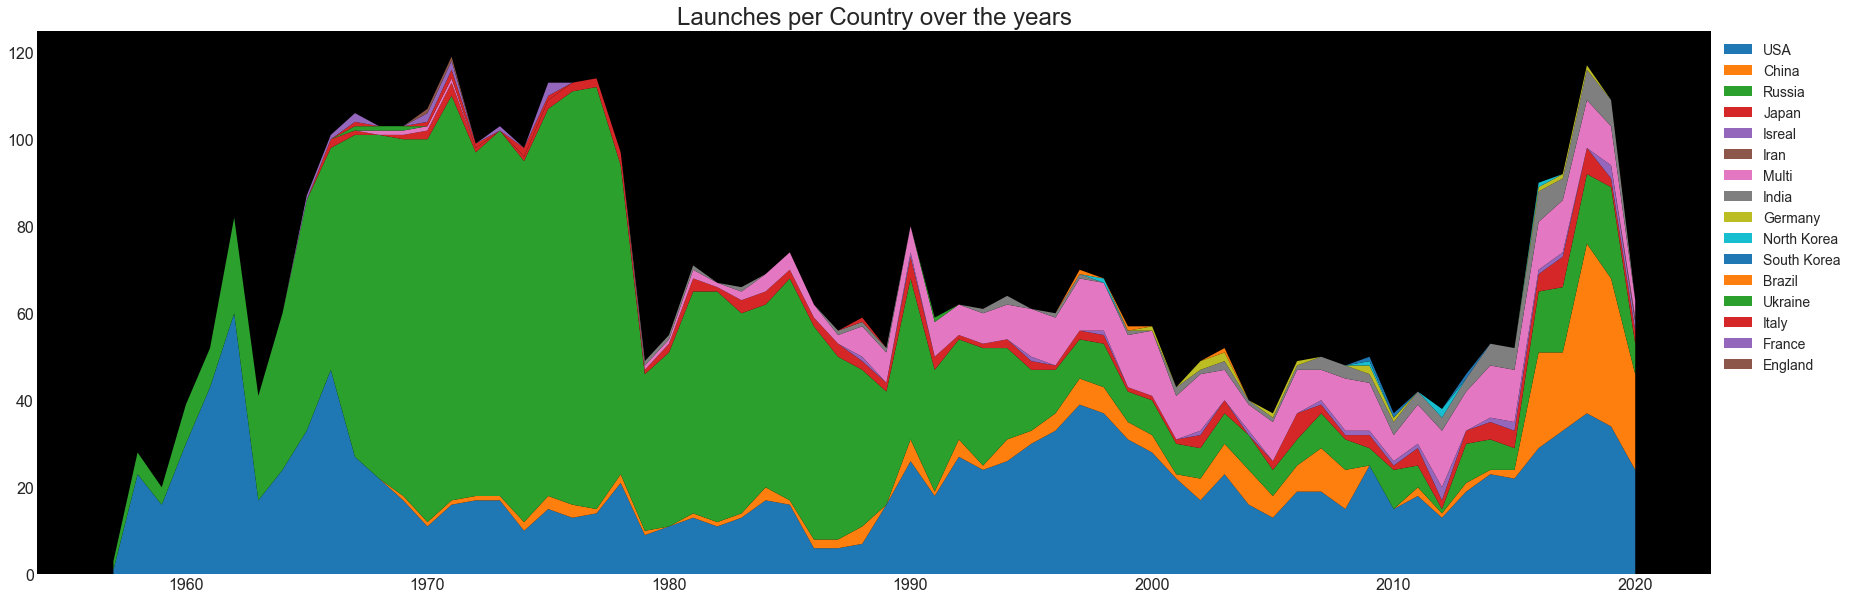

In [31]:
plt.stackplot(years,usa_list,china_list,russia_list,japan_list,isreal_list,iran_list,multi_list,india_list,germany_list,nk_list,sk_list,brazil_list,ukraine_list,italy_list,france_list,england_list)
plt.rcParams["figure.figsize"] = (30,10)
plt.style.use('./resources/space-cadets.mplstyle')
plt.legend(labels=countries,bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Launches per Country over the years')
#for i in mission_years:
#    now=i
#    plt.axvline(x=i)